<a href="https://colab.research.google.com/github/Molten-Ice/3dGolfPoseDetection/blob/colab/dev-nbs/20-working-through-source-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[VideoPose3D Inference](https://github.com/facebookresearch/VideoPose3D/blob/main/INFERENCE.md)

In [1]:
#Download VideoPose3D repo
!git clone https://github.com/facebookresearch/VideoPose3D.git

# Download pre-trained model
!wget -P VideoPose3D/checkpoint/ https://dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin

# Download and setup detectron2
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

!pip install ipympl

Cloning into 'VideoPose3D'...
remote: Enumerating objects: 121, done.
remote: Total 121 (delta 0), reused 0 (delta 0), pack-reused 121
Receiving objects: 100% (121/121), 9.53 MiB | 19.13 MiB/s, done.
Resolving deltas: 100% (41/41), done.
--2023-05-02 13:47:06--  https://dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.251.106, 52.84.251.15, 52.84.251.114, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.84.251.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67892577 (65M) [application/octet-stream]
Saving to: ‘VideoPose3D/checkpoint/pretrained_h36m_detectron_coco.bin’

pretrained_h36m_det 100%[===================>]  64.75M   159MB/s    in 0.4s    

2023-05-02 13:47:06 (159 MB/s) - ‘VideoPose3D/checkpoint/pretrained_h36m_detectron_coco.bin’ saved [67892577/67892577]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels

In [2]:
#Download video to VideoPose3D/inference/videos/ (& rename to output.mp4)
#Really need to change this to a video with 1 person in!!!
!wget -P VideoPose3D/inference/videos/ https://github.com/Molten-Ice/Deep-Learning/raw/main/Data/golf_video_1.mp4
import os
os.rename('VideoPose3D/inference/videos/golf_video_1.mp4', 'VideoPose3D/inference/videos/output.mp4')

--2023-05-02 13:51:51--  https://github.com/Molten-Ice/Deep-Learning/raw/main/Data/golf_video_1.mp4
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Molten-Ice/Deep-Learning/main/Data/golf_video_1.mp4 [following]
--2023-05-02 13:51:51--  https://raw.githubusercontent.com/Molten-Ice/Deep-Learning/main/Data/golf_video_1.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20556022 (20M) [application/octet-stream]
Saving to: ‘VideoPose3D/inference/videos/golf_video_1.mp4’

golf_video_1.mp4    100%[===================>]  19.60M  --.-KB/s    in 0.06s   

2023-05-02 13:51:52 (303 MB/s) - ‘VideoPose3

In [ ]:
#Display Video
# from IPython.display import HTML
# from base64 import b64encode
# mp4 = open('VideoPose3D/inference/videos/output.mp4','rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("""
# <video width=400 controls>
#       <source src="%s" type="video/mp4">
# </video>
# """ % data_url)

In [3]:
#inferring 2D keypoints with Detectron, creatings VideoPose3D/inference/output_directory/output.mp4.npz
import os
os.mkdir("VideoPose3D/inference/output_directory")

!cd VideoPose3D/inference/ && python infer_video_d2.py \
    --cfg COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml \
    --output-dir output_directory \
    --image-ext mp4 \
    videos

[05/02 13:51:56 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/138363331/model_final_997cc7.pkl ...
model_final_997cc7.pkl: 313MB [00:01, 174MB/s]               
Processing videos/output.mp4
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --

In [4]:
#Move output_directory from /inference to /data
import shutil 
shutil.move('VideoPose3D/inference/output_directory', 'VideoPose3D/data/output_directory') 

'VideoPose3D/data/output_directory'

In [5]:
#Create custom dataset VideoPose3D/data/data_2d_custom_myvideos.npz, using .npz files in VideoPose3D/data/output_directory
!cd VideoPose3D/data/ && python prepare_data_2d_custom.py -i output_directory -o myvideos

Parsing 2D detections from output_directory
Processing output_directory/output.mp4.npz
239 total frames processed
0 frames were interpolated
----------
Saving...
Done.


In [7]:
#Saving output keypoints
!cd VideoPose3D/ && python run.py -d custom -k myvideos -arc 3,3,3,3,3 -c checkpoint --evaluate pretrained_h36m_detectron_coco.bin --render --viz-subject output.mp4 --viz-action custom --viz-camera 0 --viz-video inference/videos/output.mp4 --viz-export keypoints_3d --viz-size 6

Namespace(dataset='custom', keypoints='myvideos', subjects_train='S1,S5,S6,S7,S8', subjects_test='S9,S11', subjects_unlabeled='', actions='*', checkpoint='checkpoint', checkpoint_frequency=10, resume='', evaluate='pretrained_h36m_detectron_coco.bin', render=True, by_subject=False, export_training_curves=False, stride=1, epochs=60, batch_size=1024, dropout=0.25, learning_rate=0.001, lr_decay=0.95, data_augmentation=True, test_time_augmentation=True, architecture='3,3,3,3,3', causal=False, channels=1024, subset=1, downsample=1, warmup=1, no_eval=False, dense=False, disable_optimizations=False, linear_projection=False, bone_length_term=True, no_proj=False, viz_subject='output.mp4', viz_action='custom', viz_camera=0, viz_video='inference/videos/output.mp4', viz_skip=0, viz_output=None, viz_export='keypoints_3d', viz_bitrate=3000, viz_no_ground_truth=False, viz_limit=-1, viz_downsample=1, viz_size=6)
Loading dataset...
Preparing data...
Loading 2D detections...
INFO: Receptive field: 243 fr

In [8]:
import sys
sys.path.insert(1, '/content/VideoPose3D')

from common.custom_dataset import CustomDataset
from common.visualization import render_animation
from common.camera import camera_to_world, image_coordinates, normalize_screen_coordinates

In [9]:
# Worked first runthrough but now not working for some reason
dataset = CustomDataset('VideoPose3D/data/data_2d_custom_myvideos.npz')

In [18]:
# Namespace(dataset='custom', keypoints='myvideos', subjects_train='S1,S5,S6,S7,S8', subjects_test='S9,S11', subjects_unlabeled='', actions='*', checkpoint='checkpoint', checkpoint_frequency=10, resume='', evaluate='pretrained_h36m_detectron_coco.bin', render=True, by_subject=False, export_training_curves=False, stride=1, epochs=60, batch_size=1024, dropout=0.25, learning_rate=0.001, lr_decay=0.95, data_augmentation=True, test_time_augmentation=True, architecture='3,3,3,3,3', causal=False, channels=1024, subset=1, downsample=1, warmup=1, no_eval=False, dense=False, disable_optimizations=False, linear_projection=False, bone_length_term=True, no_proj=False, viz_subject='output.mp4', viz_action='custom', viz_camera=0, viz_video='inference/videos/output.mp4', viz_skip=0, viz_output='keypoints_3d.mp4', viz_export=None, viz_bitrate=3000, viz_no_ground_truth=False, viz_limit=-1, viz_downsample=1, viz_size=6)

args_viz_bitrate = 3000
args_viz_output='keypoints_3d_video.mp4' # None
args_viz_limit=-1
args_viz_downsample=1
args_viz_size = 6
args_viz_video = 'VideoPose3D/inference/videos/output.mp4' #'inference/videos/output.mp4'
args_viz_skip=0

args_viz_subject = "output.mp4"
args_viz_action = "custom"
args_viz_camera = 0

In [29]:
dataset[subject].keys()

dict_keys(['custom'])

In [30]:
dataset["output.mp4"]["custom"]

{'cameras': {'id': 'output.mp4',
  'res_w': 1920,
  'res_h': 1080,
  'azimuth': 70,
  'orientation': array([ 0.14070565, -0.15007018, -0.7552408 ,  0.62232804], dtype=float32),
  'translation': array([1.841107 , 4.9552846, 1.5634454], dtype=float32)}}

In [93]:
import numpy as np
print('Loading 2D detections...')
keypoints = np.load('VideoPose3D/data/data_2d_custom_myvideos.npz', allow_pickle=True)
keypoints_metadata = keypoints['metadata'].item()
keypoints_symmetry = keypoints_metadata['keypoints_symmetry']
kps_left, kps_right = list(keypoints_symmetry[0]), list(keypoints_symmetry[1])
joints_left, joints_right = list(dataset.skeleton().joints_left()), list(dataset.skeleton().joints_right())
keypoints = keypoints['positions_2d'].item()[args_viz_subject][args_viz_action][args_viz_camera]

# # Normalize camera frame
# def normalize_screen_coordinates(X, w, h): 
#     # Normalize so that [0, w] is mapped to [-1, 1], while preserving the aspect ratio
#     return X/w*2 - [1, h/w]
# def image_coordinates(X, w, h):
#     # Reverse camera frame normalization
#     return (X + [1, h/w])*w/2

# cam = dataset.cameras()[args_viz_subject][args_viz_camera]
# keypoints = normalize_screen_coordinates(keypoints, w=cam['res_w'], h=cam['res_h'])
# keypoints = image_coordinates(keypoints, w=cam['res_w'], h=cam['res_h'])

Loading 2D detections...


In [145]:
import torch

def camera_to_world(X, R, t):
    return wrap(qrot, np.tile(R, (*X.shape[:-1], 1)), X) + t

def qrot(q, v):
    """
    Rotate vector(s) v about the rotation described by quaternion(s) q.
    Expects a tensor of shape (*, 4) for q and a tensor of shape (*, 3) for v,
    where * denotes any number of dimensions.
    Returns a tensor of shape (*, 3).
    """
    assert q.shape[-1] == 4
    assert v.shape[-1] == 3
    assert q.shape[:-1] == v.shape[:-1]

    qvec = q[..., 1:]
    uv = torch.cross(qvec, v, dim=len(q.shape)-1)
    uuv = torch.cross(qvec, uv, dim=len(q.shape)-1)
    return (v + 2 * (q[..., :1] * uv + uuv))

def wrap(func, *args, unsqueeze=False):
    """
    Wrap a torch function so it can be called with NumPy arrays.
    Input and return types are seamlessly converted.
    """
    
    # Convert input types where applicable
    args = list(args)
    for i, arg in enumerate(args):
        if type(arg) == np.ndarray:
            args[i] = torch.from_numpy(arg)
            if unsqueeze:
                args[i] = args[i].unsqueeze(0)
        
    result = func(*args)
    
    # Convert output types where applicable
    if isinstance(result, tuple):
        result = list(result)
        for i, res in enumerate(result):
            if type(res) == torch.Tensor:
                if unsqueeze:
                    res = res.squeeze(0)
                result[i] = res.numpy()
        return tuple(result)
    elif type(result) == torch.Tensor:
        if unsqueeze:
            result = result.squeeze(0)
        return result.numpy()
    else:
        return result

In [147]:
prediction = np.load('VideoPose3D/keypoints_3d.npy')
print('Loading 3D detections...')

# Invert camera transformation
rot = dataset.cameras()[args_viz_subject][args_viz_camera]['orientation']
prediction = camera_to_world(prediction, R=rot, t=0)
# We don't have the trajectory, but at least we can rebase the height
# prediction[:, :, 2] -= np.min(prediction[:, :, 2]) # places frame nicely within image
# anim_output = {'Reconstruction': prediction}

Loading 3D detections...


In [151]:
keypoints.shape, prediction.shape

((239, 17, 2), (239, 17, 3))

In [148]:
cam = dataset.cameras()[args_viz_subject][args_viz_camera]

keypoints, keypoints_metadata, poses, skeleton, fps, bitrate, azim, output, viewport = keypoints, keypoints_metadata, prediction, dataset.skeleton(), dataset.fps(), args_viz_bitrate, cam['azimuth'], args_viz_output, (cam['res_w'], cam['res_h'])
limit = args_viz_limit
downsample = args_viz_downsample
size = args_viz_size
input_video_path = args_viz_video
input_video_skip = args_viz_skip

In [149]:
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import subprocess as sp

def get_resolution(filename):
    """Returns height, width of video"""
    command = ['ffprobe', '-v', 'error', '-select_streams', 'v:0',
               '-show_entries', 'stream=width,height', '-of', 'csv=p=0', filename]
    with sp.Popen(command, stdout=sp.PIPE, bufsize=-1) as pipe:
        for line in pipe.stdout:
            w, h = line.decode().strip().split(',')
            return int(w), int(h)
            
def get_fps(filename):
    """Returns the fps of the video"""
    command = ['ffprobe', '-v', 'error', '-select_streams', 'v:0',
               '-show_entries', 'stream=r_frame_rate', '-of', 'csv=p=0', filename]
    with sp.Popen(command, stdout=sp.PIPE, bufsize=-1) as pipe:
        for line in pipe.stdout:
            a, b = line.decode().strip().split('/')
            return int(a) / int(b)

def read_video(filename, skip=0, limit=-1):
    """This function reads a video file and yields each frame as a numpy array in RGB format"""
    w, h = get_resolution(filename)
    
    command = ['ffmpeg',
            '-i', filename,
            '-f', 'image2pipe',
            '-pix_fmt', 'rgb24',
            '-vsync', '0',
            '-vcodec', 'rawvideo', '-']
    
    i = 0
    with sp.Popen(command, stdout = sp.PIPE, bufsize=-1) as pipe:
        while True:
            data = pipe.stdout.read(w*h*3)
            if not data:
                break
            i += 1
            if i > limit and limit != -1:
                continue
            if i > skip:
                yield np.frombuffer(data, dtype='uint8').reshape((h, w, 3))

<ipython-input-150-b9279329faf4>:31: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7.5


<Figure size 640x480 with 0 Axes>

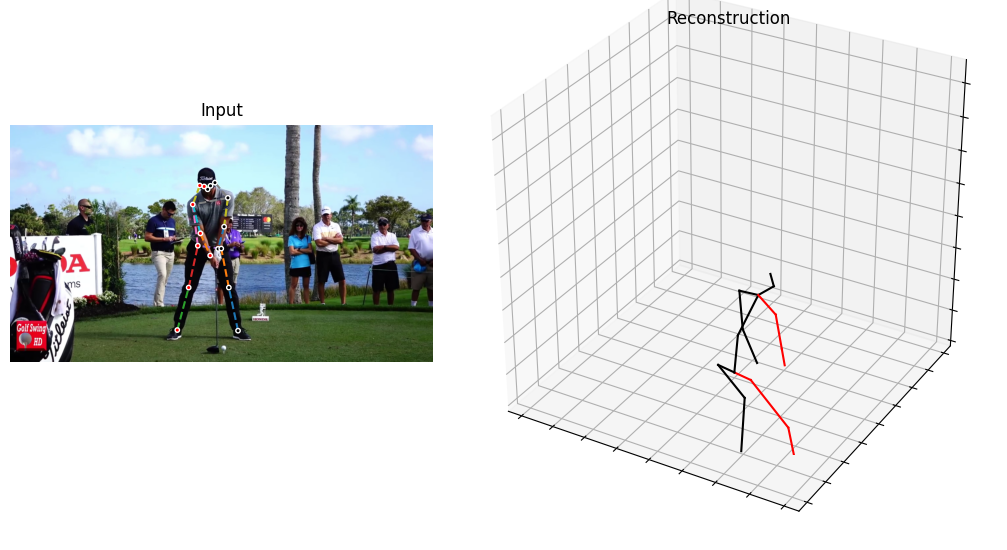

In [150]:
# %matplotlib widget
#use %matplotlib inline for non interactive
%matplotlib inline

plt.clf() 
fig = plt.figure(figsize=(2*size, size)) # 6x6
ax_in = fig.add_subplot(1, 2, 1)
ax_in.get_xaxis().set_visible(False)
ax_in.get_yaxis().set_visible(False)
ax_in.set_axis_off()
ax_in.set_title('Input')

ax_3d = []
lines_3d = []
trajectories = []
radius = 1.7

ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax.view_init(elev=15., azim=azim)
# ax.view_init(elev=15)
ax.set_xlim3d([-radius/2, radius/2])
ax.set_zlim3d([0, radius])
ax.set_ylim3d([-radius/2, radius/2])
try:
    ax.set_aspect('equal')
except NotImplementedError:
    ax.set_aspect('auto')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.dist = 7.5
ax.set_title("Reconstruction") #, pad=35
ax_3d.append(ax)
lines_3d.append([])

# Load video using ffmpeg
for f in read_video(input_video_path, skip=input_video_skip, limit=limit):
    frame = f
    break

i = 0 # frame num
ax.set_xlim3d([-radius/2 + poses[i, 0, 0], radius/2 + poses[i, 0, 0]])
ax.set_ylim3d([-radius/2 + poses[i, 0, 1], radius/2 + poses[i, 0, 1]])

# Update 2D poses
joints_right_2d = keypoints_metadata['keypoints_symmetry'][1]
colors_2d = np.full(keypoints.shape[1], 'black')
colors_2d[joints_right_2d] = 'red'
image = ax_in.imshow(frame, aspect='equal')
frame_2d_keypoints = keypoints[i]

for j, j_parent in enumerate(skeleton.parents()):
    if j_parent == -1:
        continue
        
    col = 'red' if j in skeleton.joints_right() else 'black'
    pos = poses[i]
    ax_3d[0].plot([pos[j, 0], pos[j_parent, 0]],
                                [pos[j, 1], pos[j_parent, 1]],
                                [pos[j, 2], pos[j_parent, 2]], zdir='z', c=col)
    
skeleton_layout = np.array([[16,14],[14,12],[17,15],[15,13],[12,13],[6,12],[7,13],[6,7], \
                  [6,8],[7,9],[8,10],[9,11],[2,3],[1,2],[1,3],[2,4],[3,5],[4,6],[5,7]])

points = ax_in.scatter(*frame_2d_keypoints.T, 10, color=colors_2d, edgecolors='white', zorder=10)
for pair in skeleton_layout:
    ax_in.plot(*frame_2d_keypoints[pair-1].T, linestyle = 'dashed')

plt.show()

<ipython-input-136-b9279329faf4>:31: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7.5


<Figure size 640x480 with 0 Axes>

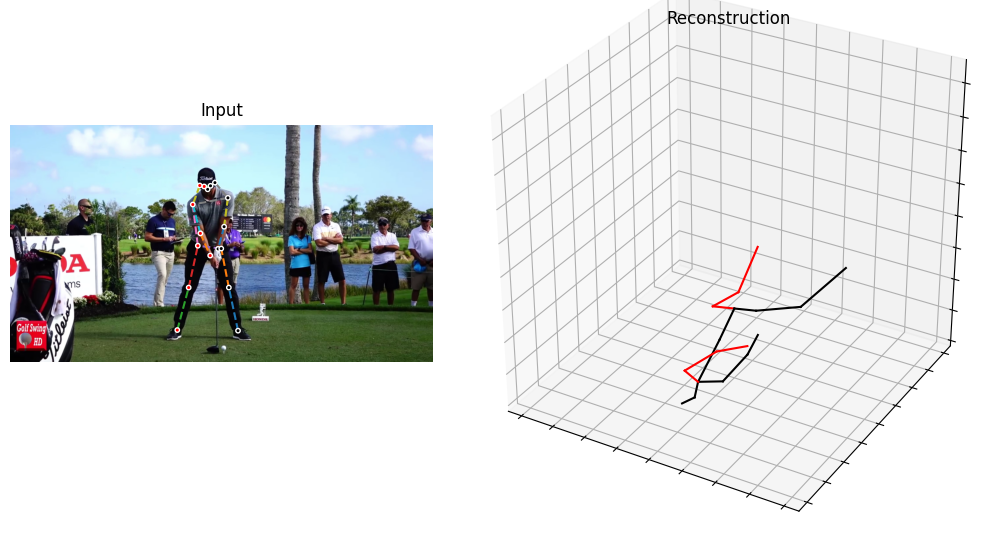

In [136]:
# 3d keypoints without any transformations

In [137]:
#red is left side, black is right side